Step 2b.2:
      width < 10: 34706
10 <= width < 20: 57250
20 <= width < 30: 24885
30 <= width < 40: 13338
40 <= width < 50: 8011
50 <= width     : 20699

Step 2b.3:
    <= width/height < 0.6: 7720
0.6 <= width/height < 0.7: 22966
0.7 <= width/height < 0.8: 46997
0.8 <= width/height < 0.9: 45458
0.9 <= width/height < 1.0: 16786
1.0 <= width/height      : 18962

Step 2b.4:


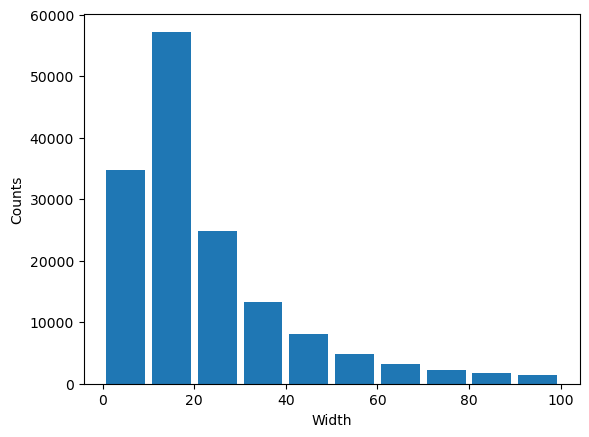

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

if __name__ == '__main__':
  anno_file = 'annotation.txt'
  with open(anno_file, 'r') as fp:
    lines = fp.readlines()    
  # Enter your code here (25%)
  # You might use the following to access each line
  # for line in lines:

  # Initialize an empty list to store all(or valid) bounding box widths and heights
  all_widths = []
  all_heights = []
  valid_widths = []
  valid_heights = []

  for line in lines:
      # use space to separate the data
      data = line.strip().split(' ')
      # bbox information start from index 1 and convert to int
      bbox_info = [int(x) for x in data[1:]]
      # create a np array to store each bbox shape = (num of bbox, 4)
      bbox_list = np.array(bbox_info).reshape(-1, 4)
      # examine the valid bbox_list (x1 >=0, y1 >= 0, x2 > x1, y2 > y1)
      # using mask to find the value that corresponding to the condition
      # when mask = 1, the np.array will select the value. Otherwise, discard it.
      mask = (bbox_list[:, 0] >= 0) & (bbox_list[:, 1] >= 0) & \
             (bbox_list[:, 2] > bbox_list[:, 0]) & (bbox_list[:, 3] > bbox_list[:, 1])
      valid_bbox_list = bbox_list[mask]

      ## Here storing the valid bbox for the following question ##
      # calculate the width(or heights) for each bounding box
      # The width of a bounding box is defined as x2-x1+1
      # The height of a bounding box is defined as y2-y1+1
      valid_width = valid_bbox_list[:, 2] - valid_bbox_list[:, 0] + 1
      valid_height = valid_bbox_list[:, 3] - valid_bbox_list[:, 1] + 1
      # extend(iterate to add) the widths(or heights) to the list
      valid_widths.extend(valid_width)
      valid_heights.extend(valid_height)
      ## But it need to store all bbox information for the question 2b.5 ##
      width = bbox_list[:, 2] - bbox_list[:, 0] + 1
      height = bbox_list[:, 3] - bbox_list[:, 1] + 1
      all_widths.extend(width)
      all_heights.extend(height)

  # Convert all_widths(or all_hieghts) to a numpy array for statistics
  valid_widths = np.array(valid_widths)
  valid_heights = np.array(valid_heights)
  
  # display statistics (2b.2)
  # in numpy, np.sum can be used to calculate the sum of all true elements in an boolean array
  print('Step 2b.2:')
  print(f'      width < 10: {np.sum(valid_widths < 10)}')
  print(f'10 <= width < 20: {np.sum((valid_widths >= 10) & (valid_widths < 20))}')
  print(f'20 <= width < 30: {np.sum((valid_widths >= 20) & (valid_widths < 30))}')
  print(f'30 <= width < 40: {np.sum((valid_widths >= 30) & (valid_widths < 40))}')
  print(f'40 <= width < 50: {np.sum((valid_widths >= 40) & (valid_widths < 50))}')
  print(f'50 <= width     : {np.sum(valid_widths >= 50)}')
  print()

  # display statistics (2b.3)
  valid_ranges = valid_widths/valid_heights
  print('Step 2b.3:')
  print(f'    <= width/height < 0.6: {np.sum(valid_ranges < 0.6)}')
  print(f'0.6 <= width/height < 0.7: {np.sum((valid_ranges >= 0.6) & (valid_ranges < 0.7))}')
  print(f'0.7 <= width/height < 0.8: {np.sum((valid_ranges >= 0.7) & (valid_ranges < 0.8))}')
  print(f'0.8 <= width/height < 0.9: {np.sum((valid_ranges >= 0.8) & (valid_ranges < 0.9))}')
  print(f'0.9 <= width/height < 1.0: {np.sum((valid_ranges >= 0.9) & (valid_ranges < 1.0))}')
  print(f'1.0 <= width/height      : {np.sum((valid_ranges >= 1.0))}')
  print()

  # Display the histogram of width
  print('Step 2b.4:')
  plt.hist(valid_widths, range(0, 101, 10), rwidth=0.85)
  plt.xlabel('Width')
  plt.ylabel('Counts')


In [35]:
# Step 2b.5: In Step 2b.1, we only consider valid bounding boxes. How many bounding boxes are invalid? Modify the above code to find the answer. (5%)
# Write down your answer here.

# Answers:
# I stored the all bbox information and valid bbox information in the above code.
# Therefore, doing the simple math by "number of all - number of valid".
# By doing so, I can know the answer of deleted number which means invalid bbox numbers.
# The answer is 535.
print(f'number of bboxs: {len(all_widths)}, number of valid bboxs {len(valid_widths)}')
print(f'The number of deleted bboxs: {len(all_widths)-len(valid_widths)}')

number of bboxs: 159424, number of valid bboxs 158889
The number of deleted bboxs: 535
